# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [9]:
# Initial imports
import os
#from pathlib import Path
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
load_dotenv()
#%matplotlib inline

True

In [12]:
# Read your api key environment variable
api_key = os.getenv("NEWSPAPER_KEY")

In [13]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [17]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q='bitcoin', language='en', sort_by='relevancy')
btc_articles

{'status': 'ok',
 'totalResults': 3471,
 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Romain Dillet',
   'title': 'PayPal to let you buy and sell cryptocurrencies in the US',
   'description': 'PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon. PayPal plans to support Bitcoin, Ethereum, Bitcoin Cash and Lite…',
   'url': 'http://techcrunch.com/2020/10/21/paypal-to-let-you-buy-and-sell-cryptocurrencies-in-the-us/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/07/GettyImages-887657568.jpg?w=600',
   'publishedAt': '2020-10-21T13:28:15Z',
   'content': 'PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon.\r\nPay… [+2069 chars]'},
  {'source': {'id': 't

In [18]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q='ethereum',
                                      language='en',
                                      sort_by='relevancy',
                                      )
eth_articles

{'status': 'ok',
 'totalResults': 1154,
 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Romain Dillet',
   'title': 'PayPal to let you buy and sell cryptocurrencies in the US',
   'description': 'PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon. PayPal plans to support Bitcoin, Ethereum, Bitcoin Cash and Lite…',
   'url': 'http://techcrunch.com/2020/10/21/paypal-to-let-you-buy-and-sell-cryptocurrencies-in-the-us/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/07/GettyImages-887657568.jpg?w=600',
   'publishedAt': '2020-10-21T13:28:15Z',
   'content': 'PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon.\r\nPay… [+2069 chars]'},
  {'source': {'id': 't

In [19]:
# Create the Bitcoin sentiment scores DataFrame

def get_sentiment_score(article, based_on):
    sentiments = []
    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                based_on : text,
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos
            })
        except AttributeError:
            pass
    # Create DataFrame
    df = pd.DataFrame(sentiments)
    return df

btc_sentiment_df = get_sentiment_score(btc_articles, 'content')
btc_sentiment_df

,content,Compound,Negative,Neutral,Positive
0,PayPal has partnered with cryptocurrency compa...,0.0000,0.000,1.000,0.000
1,PayPal is rolling out cryptocurrency support l...,0.6808,0.000,0.838,0.162
2,The Financial Crimes Enforcement Network (FinC...,-0.7184,0.154,0.846,0.000
3,Cryptocurrencies like bitcoin are a fun way to...,0.2732,0.071,0.831,0.098
4,World News\r\nAlexis Akwagyiram\r\nLAGOS (Reut...,-0.6597,0.198,0.802,0.000
5,Emerging Markets\r\nAlexis Akwagyiram\r\nLAGOS...,-0.6597,0.203,0.797,0.000
6,PayPal will soon allow it's 305 million active...,0.7269,0.000,0.814,0.186
7,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,1.000,0.000
8,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,1.000,0.000
9,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,1.000,0.000


In [20]:
# Create the ethereum sentiment scores DataFrame
eth_sentiment_df = get_sentiment_score(eth_articles, 'content')
eth_sentiment_df

,content,Compound,Negative,Neutral,Positive
0,PayPal has partnered with cryptocurrency compa...,0.0000,0.000,1.000,0.000
1,Breitling is partnering with Arianee to issue ...,0.0000,0.000,1.000,0.000
2,"September\r\n30, 2020\r\n8 min read\r\nOpinion...",-0.2960,0.061,0.939,0.000
3,PayPal is rolling out cryptocurrency support l...,0.6808,0.000,0.838,0.162
4,Portions of the global economy melted down in ...,-0.4215,0.132,0.783,0.085
5,"The end is in sight for Quibi, PayPal adds cry...",0.4019,0.000,0.926,0.074
6,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.000,0.910,0.090
7,Amazon is treating Prime members to an onslaug...,0.1779,0.000,0.954,0.046
8,LONDON (Reuters) - PayPal Holdings Inc joined ...,0.0000,0.000,1.000,0.000
9,LONDON (Reuters) - PayPal Holdings Inc joined ...,0.0000,0.000,1.000,0.000


In [21]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.173865,0.041000,0.895000,0.064050
std,0.455632,0.067954,0.067423,0.056918
min,-0.718400,0.000000,0.797000,0.000000
25%,0.000000,0.000000,0.839500,0.000000
50%,0.261600,0.000000,0.907500,0.070000
75%,0.507000,0.044000,0.914000,0.090000
max,0.726900,0.203000,1.000000,0.186000


In [22]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,17.000000,17.000000,17.000000,17.000000
mean,0.192888,0.014706,0.922765,0.062588
std,0.359020,0.035984,0.083209,0.075058
min,-0.421500,0.000000,0.751000,0.000000
25%,0.000000,0.000000,0.866000,0.000000
50%,0.000000,0.000000,0.939000,0.046000
75%,0.507000,0.000000,1.000000,0.090000
max,0.912000,0.132000,1.000000,0.249000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC

Q: Which coin had the highest compound score?

A: ETH

Q. Which coin had the highest positive score?

A: ETH

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [23]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [24]:
# Expand the default stopwords list if necessary
lemmatizer = WordNetLemmatizer()
sw = set(stopwords.words('english'))

In [26]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    
    # Convert the words to lowercase
    
    # Remove the punctuation
    
    # Remove the stop words
    
    # Lemmatize Words into root words
    
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens


In [27]:
# Create a new tokens column for bitcoin
btc_sentiment_df['tokens'] = btc_sentiment_df['content'].apply(tokenizer)
btc_sentiment_df

,content,Compound,Negative,Neutral,Positive,tokens
0,PayPal has partnered with cryptocurrency compa...,0.0000,0.000,1.000,0.000,"[paypal, ha, partnered, cryptocurrency, compan..."
1,PayPal is rolling out cryptocurrency support l...,0.6808,0.000,0.838,0.162,"[paypal, rolling, cryptocurrency, support, lat..."
2,The Financial Crimes Enforcement Network (FinC...,-0.7184,0.154,0.846,0.000,"[financial, crimes, enforcement, network, finc..."
3,Cryptocurrencies like bitcoin are a fun way to...,0.2732,0.071,0.831,0.098,"[cryptocurrencies, like, bitcoin, fun, way, sk..."
4,World News\r\nAlexis Akwagyiram\r\nLAGOS (Reut...,-0.6597,0.198,0.802,0.000,"[world, newsalexis, akwagyiramlagos, reuters, ..."
5,Emerging Markets\r\nAlexis Akwagyiram\r\nLAGOS...,-0.6597,0.203,0.797,0.000,"[emerging, marketsalexis, akwagyiramlagos, reu..."
6,PayPal will soon allow it's 305 million active...,0.7269,0.000,0.814,0.186,"[paypal, soon, allow, million, active, user, b..."
7,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,1.000,0.000,"[reuters, stafffile, photo, representations, v..."
8,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,1.000,0.000,"[reuters, stafffile, photo, representations, v..."
9,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,1.000,0.000,"[reuters, stafffile, photo, representations, v..."


In [28]:
# Create a new tokens column for ethereum
eth_sentiment_df['tokens'] = eth_sentiment_df['content'].apply(tokenizer)
eth_sentiment_df

,content,Compound,Negative,Neutral,Positive,tokens
0,PayPal has partnered with cryptocurrency compa...,0.0000,0.000,1.000,0.000,"[paypal, ha, partnered, cryptocurrency, compan..."
1,Breitling is partnering with Arianee to issue ...,0.0000,0.000,1.000,0.000,"[breitling, partnering, arianee, issue, new, k..."
2,"September\r\n30, 2020\r\n8 min read\r\nOpinion...",-0.2960,0.061,0.939,0.000,"[september, min, readopinions, expressed, entr..."
3,PayPal is rolling out cryptocurrency support l...,0.6808,0.000,0.838,0.162,"[paypal, rolling, cryptocurrency, support, lat..."
4,Portions of the global economy melted down in ...,-0.4215,0.132,0.783,0.085,"[portions, global, economy, melted, emerging, ..."
5,"The end is in sight for Quibi, PayPal adds cry...",0.4019,0.000,0.926,0.074,"[end, sight, quibi, paypal, add, cryptocurrenc..."
6,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.000,0.910,0.090,"[robot, colleague, satoshi, nakaboto, writes, ..."
7,Amazon is treating Prime members to an onslaug...,0.1779,0.000,0.954,0.046,"[amazon, treating, prime, member, onslaught, d..."
8,LONDON (Reuters) - PayPal Holdings Inc joined ...,0.0000,0.000,1.000,0.000,"[london, reuters, paypal, holdings, inc, joine..."
9,LONDON (Reuters) - PayPal Holdings Inc joined ...,0.0000,0.000,1.000,0.000,"[london, reuters, paypal, holdings, inc, joine..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [29]:
from collections import Counter
from nltk import ngrams

In [32]:
# Generate the Bitcoin N-grams where N=2
def get_token(df):
    tokens = []
    for i in df['tokens']:
        tokens.extend(i)
    return tokens

btc_tokens = get_token(btc_sentiment_df)
eth_tokens = get_token(eth_sentiment_df)

In [36]:
# Generate the Ethereum N-grams where N=2
def bigram_counter(tokens, N):
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

bigram_btc = bigram_counter(btc_tokens, 2)
bigram_btc

{('paypal', 'ha'): 1,
 ('ha', 'partnered'): 1,
 ('partnered', 'cryptocurrency'): 1,
 ('cryptocurrency', 'company'): 1,
 ('company', 'paxos'): 1,
 ('paxos', 'launch'): 1,
 ('launch', 'new'): 1,
 ('new', 'service'): 1,
 ('service', 'paypal'): 1,
 ('paypal', 'user'): 1,
 ('user', 'us'): 1,
 ('us', 'soon'): 1,
 ('soon', 'able'): 1,
 ('able', 'buy'): 1,
 ('buy', 'hold'): 2,
 ('hold', 'sell'): 2,
 ('sell', 'cryptocurrencies'): 2,
 ('cryptocurrencies', 'country'): 1,
 ('country', 'coming'): 1,
 ('coming', 'soonpay'): 1,
 ('soonpay', 'char'): 1,
 ('char', 'paypal'): 2,
 ('paypal', 'rolling'): 1,
 ('rolling', 'cryptocurrency'): 1,
 ('cryptocurrency', 'support'): 2,
 ('support', 'later'): 1,
 ('later', 'yearillustration'): 1,
 ('yearillustration', 'alex'): 1,
 ('alex', 'castro'): 1,
 ('castro', 'vergepaypal'): 1,
 ('vergepaypal', 'wednesday'): 1,
 ('wednesday', 'announced'): 1,
 ('announced', 'would'): 1,
 ('would', 'begin'): 1,
 ('begin', 'supporting'): 1,
 ('supporting', 'cryptocurrencies'): 1

In [37]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [39]:
# Get the top 10 words for Bitcoin
token_count(btc_tokens, 10)

[('bitcoin', 26),
 ('char', 20),
 ('reuters', 15),
 ('satoshi', 10),
 ('nakaboto', 10),
 ('taken', 6),
 ('btc', 6),
 ('paypal', 5),
 ('pay', 5),
 ('robot', 5)]

In [40]:
# Get the top 10 words for Ethereum
token_count(eth_tokens, 10)

[('char', 17),
 ('bitcoin', 11),
 ('paypal', 9),
 ('cryptocurrency', 8),
 ('us', 6),
 ('digital', 6),
 ('wednesday', 6),
 ('buy', 5),
 ('hold', 5),
 ('sell', 5)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

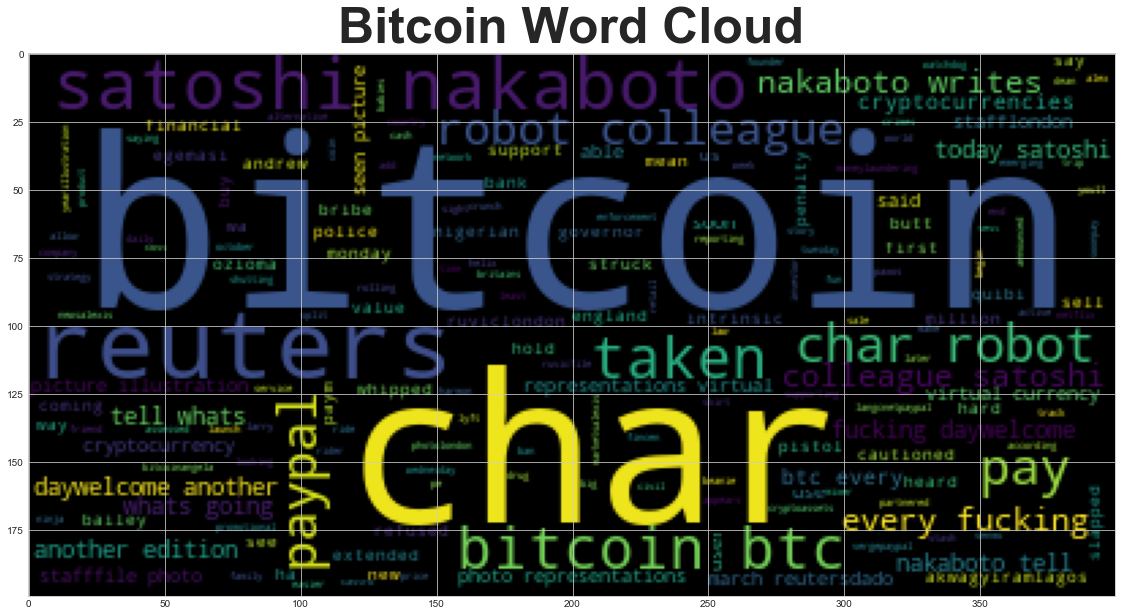

In [42]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(btc_tokens))
plt.title("Bitcoin Word Cloud", fontsize = 50, fontweight = 'bold')
plt.imshow(wc)

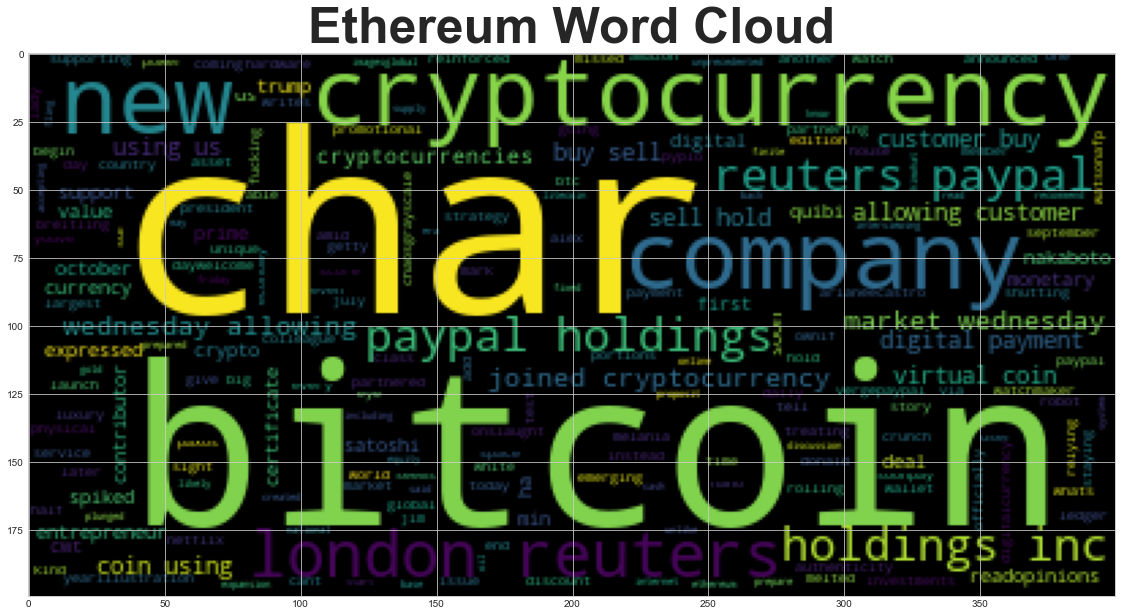

In [43]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(eth_tokens))
plt.title("Ethereum Word Cloud", fontsize = 50, fontweight = 'bold')
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [44]:
import spacy
from spacy import displacy

In [45]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [46]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [47]:
# Concatenate all of the bitcoin text together
btc_content = ' '.join(btc_sentiment_df['content'])
btc_content

"PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon.\r\nPay… [+2069 chars] PayPal is rolling out cryptocurrency support later this year\r\nIllustration by Alex Castro / The Verge\r\nPayPal on Wednesday announced it would begin supporting cryptocurrencies for the first time, all… [+2172 chars] The Financial Crimes Enforcement Network (FinCEN) has assessed a civil penalty of $60 million from Larry Dean Harmon, the founder of bitcoin mixers Helix and Coin Ninja. The penalty is the first of i… [+1806 chars] Cryptocurrencies like bitcoin are a fun way to skirt money-laundering laws and pay for drugs, but, according to reporting by Reuters, it appears youll now be able to use it to pay for Beanie Babies a… [+3888 chars] World News\r\nAlexis Akwagyiram\r\nLAGOS (Reuters) - Ozioma Egemasi says Nigerian police slapped, whipped and struck him with the but

In [50]:
# Run the NER processor on all of the text
doc = nlp(btc_content)

# Add a title to the document
doc.user_data["title"] = "BITCOIN NER"

In [51]:
# Render the visualization
displacy.render(doc, style='ent')

In [52]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

PayPal ORG
Paxos ORG
PayPal PRODUCT
U.S. GPE
PayPal PRODUCT
later this year DATE
Alex Castro PERSON
The Verge
 ORG
Wednesday DATE
first ORDINAL
The Financial Crimes Enforcement Network ORG
$60 million MONEY
Larry Dean Harmon PERSON
Helix GPE
Coin Ninja ORG
first ORDINAL
Reuters ORG
Beanie Babies WORK_OF_ART
World News WORK_OF_ART
Alexis Akwagyiram PERSON
Reuters ORG
Ozioma Egemasi ORG
Nigerian NORP
Reuters ORG
Ozioma Egemasi ORG
Nigerian NORP
PayPal PRODUCT
305 million CARDINAL
Bitcoin GPE
Angela Lang PERSON
Reuters ORG
Bitcoin GPE
March 13, 2020 DATE
Dado Ruvic PERSON
LONDON GPE
Reuters ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Dado Ruvic/File Photo ORG
LONDON GPE
Reuters ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
March 13, 2020 DATE
Dado Ruvic PERSON
LONDON GPE
Reuters ORG
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Reuters ORG
LONDON GPE
Reuters ORG
Bank of England ORG
Andrew Bailey PERSON
Monday

---

## Ethereum NER

In [53]:
# Concatenate all of the bitcoin text together
eth_content = ' '.join(eth_sentiment_df['content'])
eth_content

"PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon.\r\nPay… [+2069 chars] Breitling is partnering with Arianee to issue a new kind of certificates of authenticity for its luxury watches. Instead of relying on physical certificates, the watchmaker gives you a unique digital… [+1593 chars] September\r\n30, 2020\r\n8 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nIf you’ve had even half an eye on the cryptocurrency space in 2020, then you can’t have missed the sur… [+8935 chars] PayPal is rolling out cryptocurrency support later this year\r\nIllustration by Alex Castro / The Verge\r\nPayPal on Wednesday announced it would begin supporting cryptocurrencies for the first time, all… [+2172 chars] Portions of the global economy melted down in 2020, but an emerging asset class seems to have reinforced its staying power am

In [55]:
# Run the NER processor on all of the text
doc = nlp(eth_content)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [56]:
# Render the visualization
displacy.render(doc, style='ent')

In [57]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

PayPal ORG
Paxos ORG
PayPal PRODUCT
U.S. GPE
Arianee PERSON
September DATE
30 DATE
2020 DATE
8 CARDINAL
half CARDINAL
2020 DATE
PayPal PRODUCT
later this year DATE
Alex Castro PERSON
The Verge
 ORG
Wednesday DATE
first ORDINAL
2020 DATE
Grayscale Investments ORG
Quibi ORG
PayPal PRODUCT
Netflix PERSON
Daily Crunch WORK_OF_ART
October 21, 2020 DATE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Amazon ORG
Prime Day DATE
One CARDINAL
the Ledger Nano S WORK_OF_ART
39.99 MONEY
LONDON GPE
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
LONDON GPE
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
LONDON GPE
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
LONDON GPE
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
US GPE
Donald Trump PERSON
First ORDINAL
Lady Melania Trump PERSON
the White House ORG
July 7, 2020 DATE
JIM WATSON PERSON
Getty Images ORG
Friday DATE
Bitcoin GPE
Wednesday DATE
PayPal ORG
Bit